# Diabete ML1

## Import Pandas et le .csv

In [1]:
import pandas as pd

df = pd.read_csv("./data/train_with_id.csv")

df.head()

,ID,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,60,Female,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Positive
1,2,85,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
2,3,48,Male,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,No,No,No,No,Positive
3,4,41,Male,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Positive
4,5,57,Male,No,No,No,No,Yes,No,Yes,No,No,No,No,Yes,No,No,Negative


## Vérifie si il ya des données manquantes dans certains index

In [2]:
df.isna().sum() 

ID                    0
Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

## Vérifie le type de données dans train_with_id.csv

In [3]:
df.dtypes


ID                     int64
Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

## Nettoyage des colonnes, transforme les object en 'boolean' (int)

In [4]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].map({"Yes":1,"No":0, "Male":1, "Female":0, "Positive":1, "Negative":0}) 
df.head()

,ID,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,1,60,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1
1,2,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1
2,3,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1
3,4,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1
4,5,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0


In [5]:
df['Age'].describe() # Détails la colonne age, pas d'incohérence

count    416.000000
mean      47.963942
std       12.137412
min       16.000000
25%       38.750000
50%       48.000000
75%       57.000000
max       90.000000
Name: Age, dtype: float64

## Corrige les index, tout en minuscule et snake_case

In [6]:
df.columns = (df
               .columns
               .str
               .replace(' ', '_')
               .str
               .lower()
               .str
               .strip())
df.columns

Index(['id', 'age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'class'],
      dtype='object')

## Ignore

In [7]:
%pip install seaborn
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Tableau croisé âge vs classe (effectifs) :

class       0   1
age_group        
0-20        0   1
21-30      25  12
31-40      30  67
41-50      43  70
51-60      43  62
61-70      13  39
71-80       6   2
81-90       0   3
91-100      0   0

Âge moyen par classe :
 class
0    46.60625
1    48.81250
Name: age, dtype: float64

Prévalence des symptômes par sexe :

        polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
gender                                                                   
0            0.0         0.0                 0.0       0.0         0.0   
1            0.0         0.0                 0.0       0.0         0.0   

        genital_thrush  visual_blurring  itching  irritability  \
gender                                                           
0                  0.0              0.0      0.0           0.0   
1                  0.0              0.0      0.0           0.0   

        delayed_healing  partial_paresis  muscle_stiffness  alopecia  obe

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2316\2757623750.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_class_table = df.groupby('age_group')['class'].value_counts().unstack(fill_value=0)


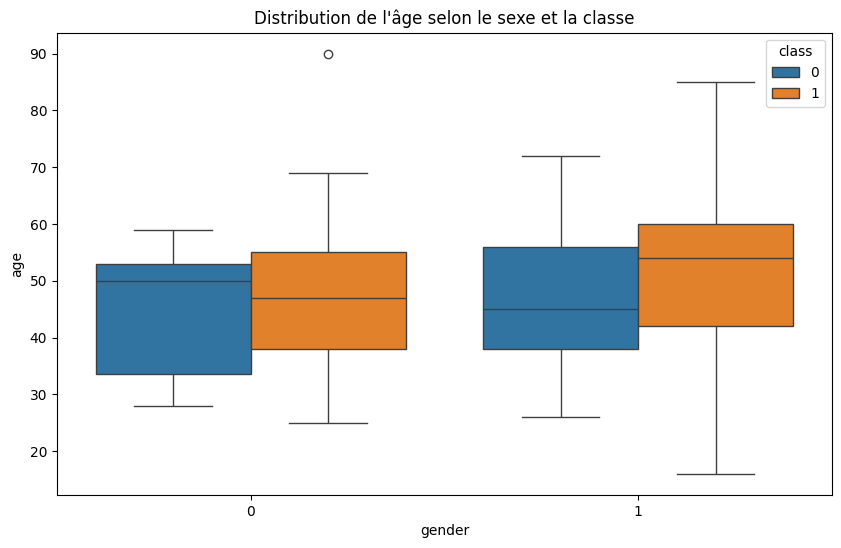

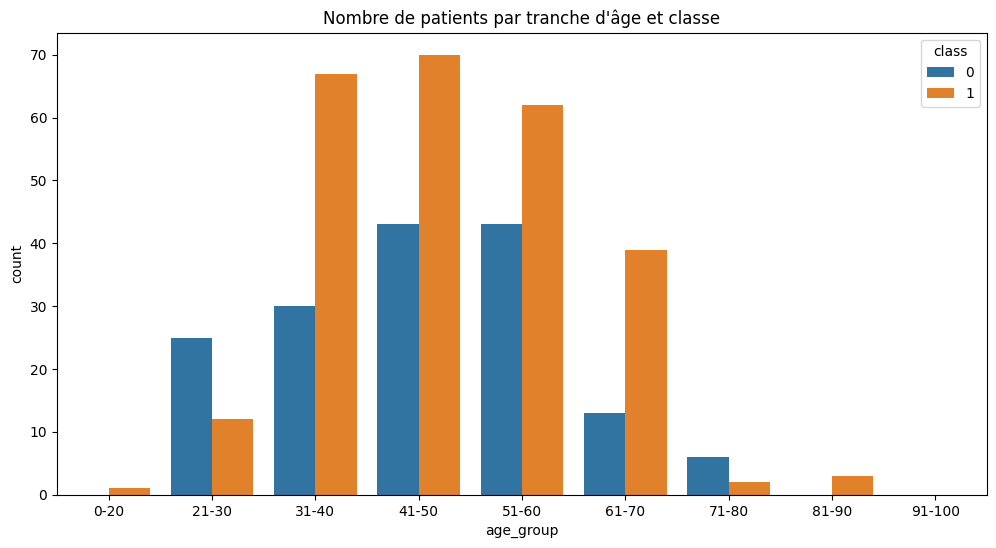

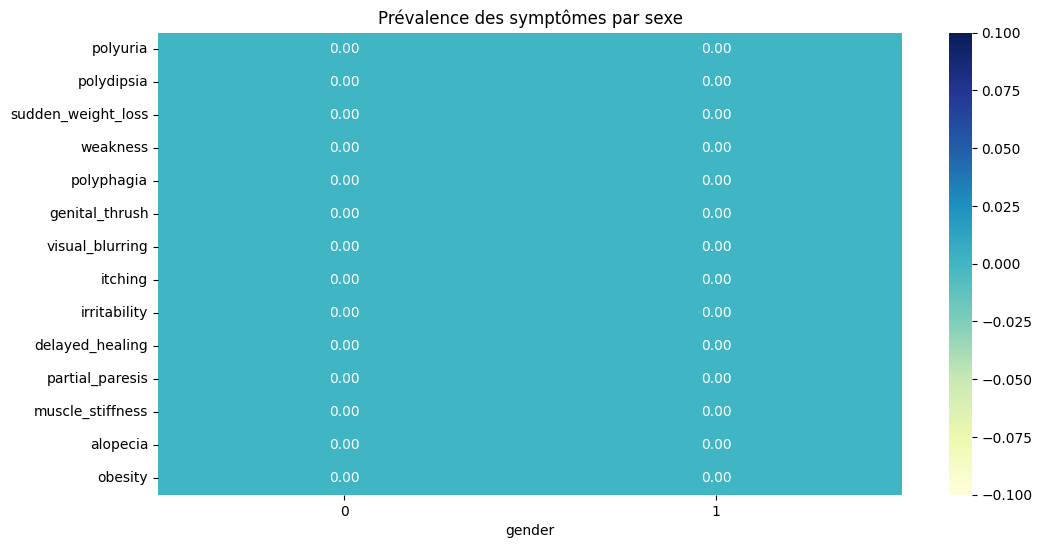

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer des tranches d'âge (par exemple toutes les 10 ans)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# 1️. Tableau croisé : âge vs classe (moyenne ou count)
age_class_table = df.groupby('age_group')['class'].value_counts().unstack(fill_value=0)
print("Tableau croisé âge vs classe (effectifs) :\n")
print(age_class_table)

# Option : âge moyen des positifs vs négatifs
mean_age = df.groupby('class')['age'].mean()
print("\nÂge moyen par classe :\n", mean_age)

# 2️. Comparer la prévalence des symptômes selon le sexe
symptoms = df.columns[3:-2]  # colonnes symptômes (avant age_group et class)
prevalence_by_gender = df.groupby('gender')[symptoms].apply(lambda x: (x=='Yes').mean())
print("\nPrévalence des symptômes par sexe :\n")
print(prevalence_by_gender)

# 3. Graphiques combinant âge, sexe, classe
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='age', hue='class', data=df)
plt.title("Distribution de l'âge selon le sexe et la classe")
plt.show()

# Option : countplot par tranche d'âge, sexe et classe
plt.figure(figsize=(12,6))
sns.countplot(x='age_group', hue='class', data=df)
plt.title("Nombre de patients par tranche d'âge et classe")
plt.show()

# Option : heatmap prévalence symptômes par sexe
plt.figure(figsize=(12,6))
sns.heatmap(prevalence_by_gender.T, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Prévalence des symptômes par sexe")
plt.show()

## Export en .csv vers ./data/diabetes_clean.csv

In [9]:
df.to_csv('./data/diabetes_clean.csv', index=False)
df_clean = pd.read_csv('./data/diabetes_clean.csv')
df_clean.head()

,id,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class,age_group
0,1,60,0,1,0,1,1,0,1,1,1,0,1,1,1,0,1,1,51-60
1,2,85,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,1,81-90
2,3,48,1,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,41-50
3,4,41,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,1,41-50
4,5,57,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,51-60


## Visualisations exploratoires

C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2316\2023467444.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels(['Femme', 'Homme'])
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2316\2023467444.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=symptom_freq.values, y=symptom_freq.index, ax=axes[0, 2], palette='rocket')
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2316\2023467444.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='class', y='age', ax=axes[1, 2], palette='Set2')
C:\Users\Apprenant\AppData\Local\Temp\ipykernel_2316\2023467444.py:50: U

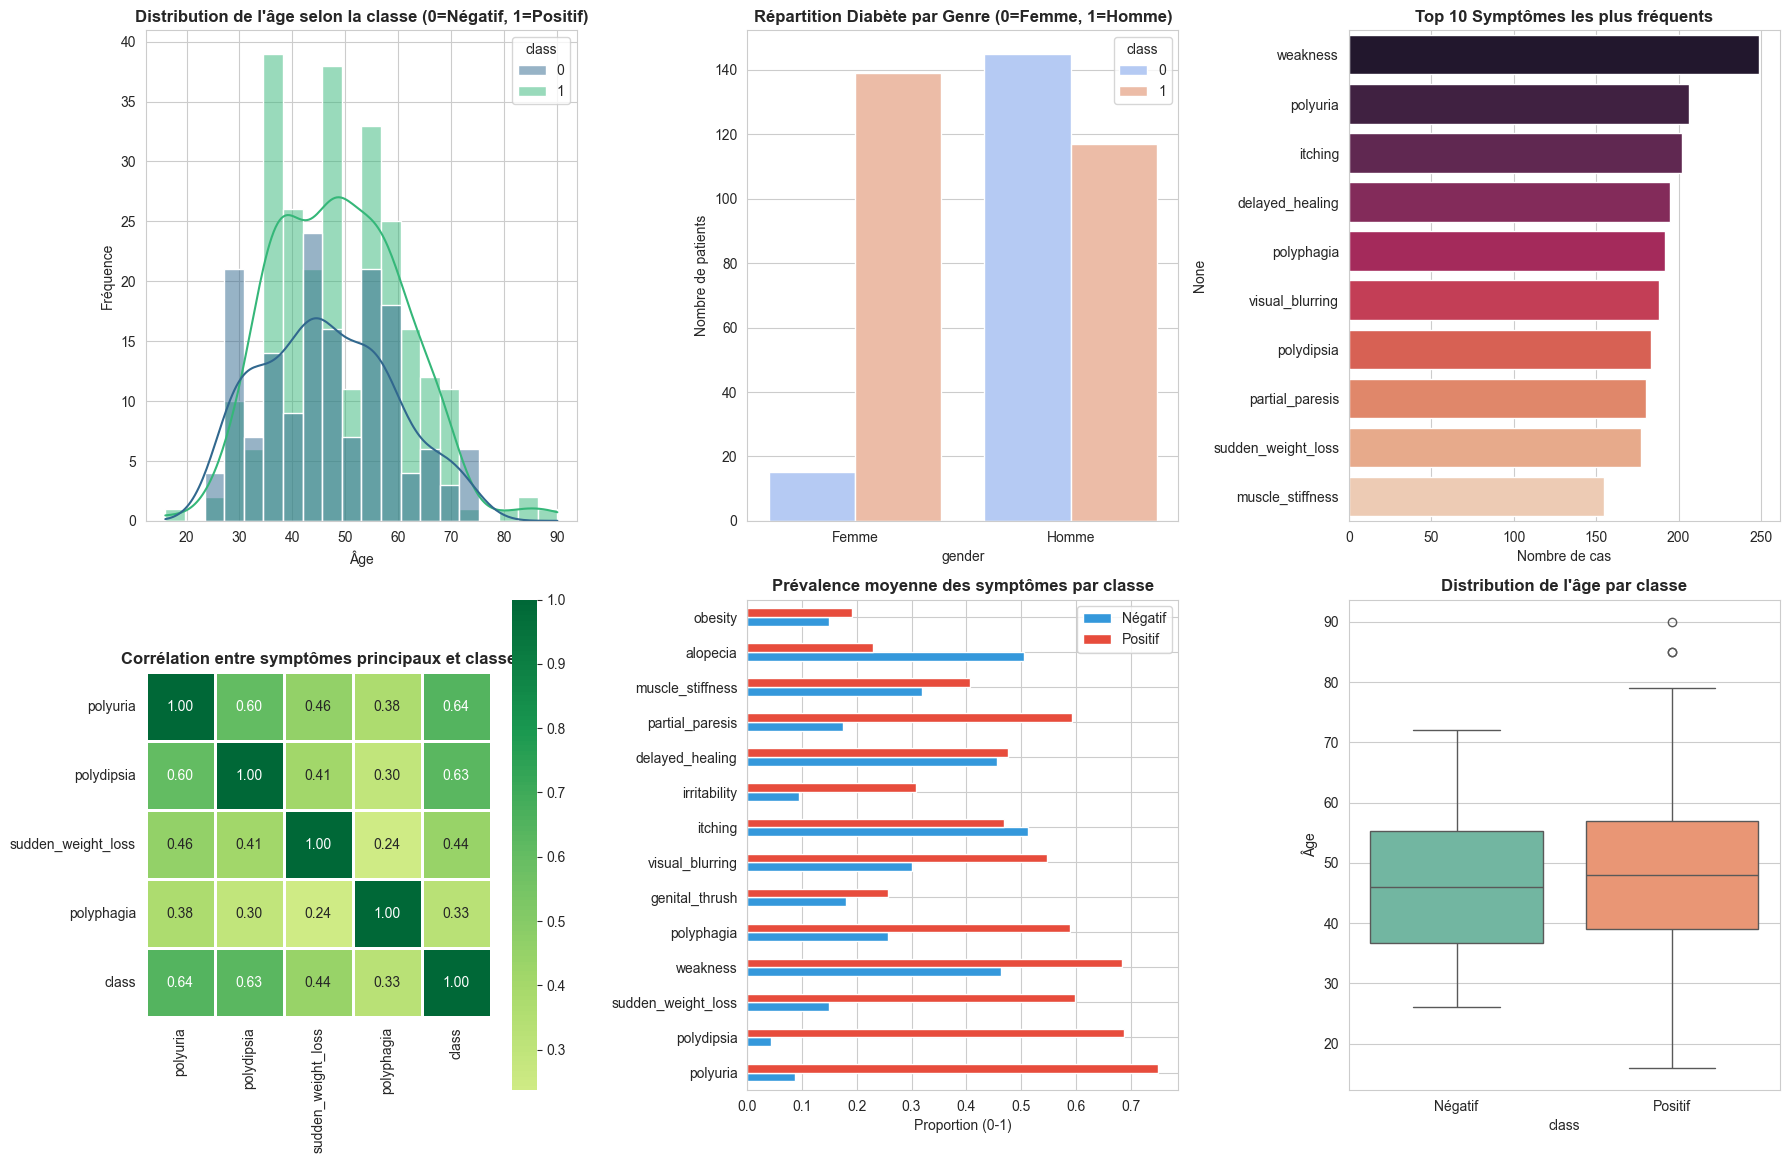

STATISTIQUES DESCRIPTIVES

Nombre total de patients : 416
Cas positifs : 256 (61.5%)
Cas négatifs : 160 (38.5%)

Âge moyen des positifs : 48.8 ans
Âge moyen des négatifs : 46.6 ans


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuration du style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

# Créer une figure avec plusieurs subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribution de l'âge selon la classe
sns.histplot(data=df_clean, x='age', hue='class', bins=20, kde=True, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title("Distribution de l'âge selon la classe (0=Négatif, 1=Positif)", fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Âge')
axes[0, 0].set_ylabel('Fréquence')

# 2. Répartition des classes par genre
class_gender = df_clean.groupby(['gender', 'class']).size().reset_index(name='count')
sns.barplot(data=class_gender, x='gender', y='count', hue='class', ax=axes[0, 1], palette='coolwarm')
axes[0, 1].set_title('Répartition Diabète par Genre (0=Femme, 1=Homme)', fontsize=12, fontweight='bold')
axes[0, 1].set_xticklabels(['Femme', 'Homme'])
axes[0, 1].set_ylabel('Nombre de patients')

# 3. Top 10 symptômes les plus fréquents
symptom_cols = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 
                'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing',
                'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity']
symptom_freq = df_clean[symptom_cols].sum().sort_values(ascending=False).head(10)
sns.barplot(x=symptom_freq.values, y=symptom_freq.index, ax=axes[0, 2], palette='rocket')
axes[0, 2].set_title('Top 10 Symptômes les plus fréquents', fontsize=12, fontweight='bold')
axes[0, 2].set_xlabel('Nombre de cas')

# 4. Corrélation entre symptômes principaux et la classe
main_symptoms = ['polyuria', 'polydipsia', 'sudden_weight_loss', 'polyphagia', 'class']
corr_matrix = df_clean[main_symptoms].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=axes[1, 0], 
            square=True, linewidths=1)
axes[1, 0].set_title('Corrélation entre symptômes principaux et classe', fontsize=12, fontweight='bold')

# 5. Prévalence des symptômes chez les diabétiques vs non-diabétiques
symptom_by_class = df_clean.groupby('class')[symptom_cols].mean()
symptom_by_class.T.plot(kind='barh', ax=axes[1, 1], color=['#3498db', '#e74c3c'])
axes[1, 1].set_title('Prévalence moyenne des symptômes par classe', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Proportion (0-1)')
axes[1, 1].legend(['Négatif', 'Positif'])

# 6. Boxplot âge par classe
sns.boxplot(data=df_clean, x='class', y='age', ax=axes[1, 2], palette='Set2')
axes[1, 2].set_title('Distribution de l\'âge par classe', fontsize=12, fontweight='bold')
axes[1, 2].set_xticklabels(['Négatif', 'Positif'])
axes[1, 2].set_ylabel('Âge')

plt.tight_layout()
plt.show()

# Statistiques descriptives supplémentaires
print("=" * 60)
print("STATISTIQUES DESCRIPTIVES")
print("=" * 60)
print(f"\nNombre total de patients : {len(df_clean)}")
print(f"Cas positifs : {df_clean['class'].sum()} ({df_clean['class'].sum()/len(df_clean)*100:.1f}%)")
print(f"Cas négatifs : {len(df_clean) - df_clean['class'].sum()} ({(1-df_clean['class'].sum()/len(df_clean))*100:.1f}%)")
print(f"\nÂge moyen des positifs : {df_clean[df_clean['class']==1]['age'].mean():.1f} ans")
print(f"Âge moyen des négatifs : {df_clean[df_clean['class']==0]['age'].mean():.1f} ans")